In [25]:
import pandas as pd
import numpy as np

In [206]:
df=pd.read_csv('nbl_eval.csv')

In [3]:
df.head()

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination
0,7739,13,291.96,5.67,2821.21,San Antonio,Houston
1,1877,23,778.56,6.19,290.03,Detroit,San Francisco
2,3019,9,2433.00,4.55,682.18,San Diego,Tucson
3,6995,18,389.28,6.54,183.41,Minneapolis,New Orleans
4,7583,21,1946.40,6.58,238.36,New Orleans,Baltimore


In [4]:
df.shape

(10286, 7)

In [5]:
df.dtypes

truckingcompanyid      int64
productid              int64
distanceinmiles      float64
fuelcost             float64
linehaulcost         float64
source                object
destination           object
dtype: object

In [6]:
df['truckingcompanyid']=df['truckingcompanyid'].astype(str)
df['productid']=df['productid'].astype(str)

In [7]:
df.isna().sum()

truckingcompanyid    0
productid            0
distanceinmiles      0
fuelcost             0
linehaulcost         0
source               0
destination          0
dtype: int64

In [8]:
df_num=df.select_dtypes(exclude='object')
df_cat=df.select_dtypes(include='object')

In [9]:
df_num.describe()

,distanceinmiles,fuelcost,linehaulcost
count,10286.000000,10286.000000,10286.000000
mean,1616.187544,5.499473,830.179412
std,1109.212772,0.987558,1696.541911
min,97.320000,2.150000,7.490000
25%,681.240000,4.850000,150.402500
50%,1459.800000,5.500000,326.135000
75%,2433.000000,6.160000,771.737500
max,4671.360000,9.550000,34845.530000


In [10]:
df_cat.describe()

,truckingcompanyid,productid,source,destination
count,10286,10286,10286,10286
unique,6153,24,49,49
top,5367,4,Phoenix,New Orleans
freq,8,464,242,262


## Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

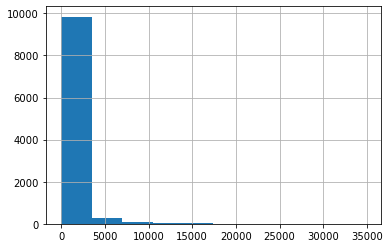

In [14]:
df_num.linehaulcost.hist()

<AxesSubplot:>

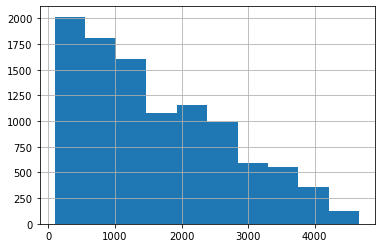

In [32]:
df_num.distanceinmiles.hist()

<AxesSubplot:xlabel='distanceinmiles', ylabel='linehaulcost'>

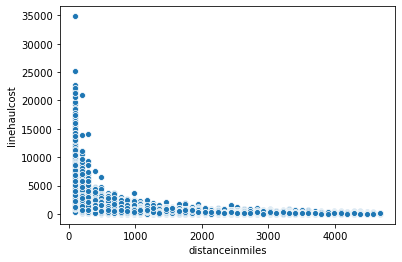

In [19]:
sns.scatterplot(data=df_num, x='distanceinmiles',y='linehaulcost')

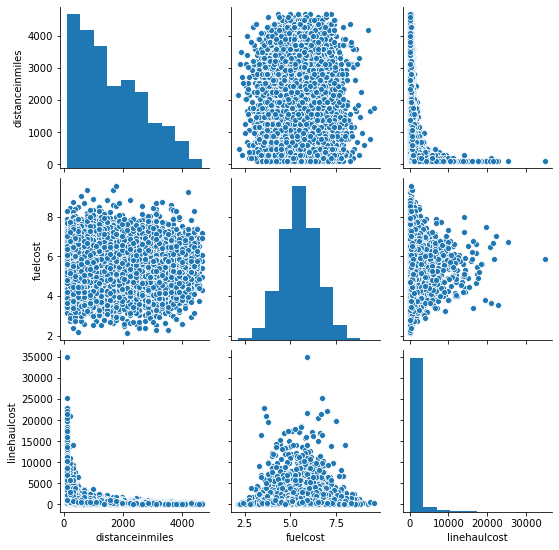

In [24]:
sns.pairplot(data=df_num)

## Sampling

In [58]:
from sklearn.model_selection import train_test_split

## Method1

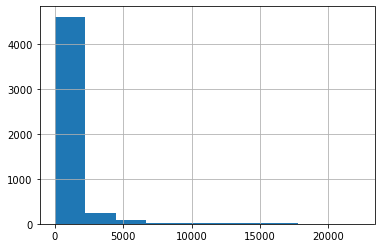

In [101]:
df_1=df.sample(5000)
df_1.linehaulcost.hist()
plt.show()

## Method2

In [102]:
X=df.loc[:,df.columns != 'linehaulcost']
y=df['linehaulcost']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

<AxesSubplot:>

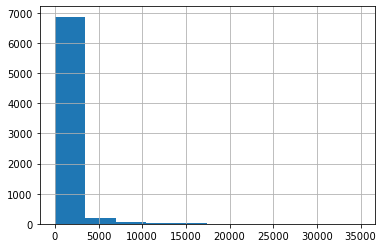

In [103]:
y_train.hist()

### Comparing sample data and original data

In [159]:
from scipy.stats import ks_2samp,f_oneway,kruskal
import scipy.stats as stats

## Kolmogorov-Smirnov	(K-S)	Test:

In [105]:
ks_2samp(df.linehaulcost, df_1.linehaulcost)

KstestResult(statistic=0.006465448181994904, pvalue=0.9988267695460475)

### KS statistic is small and the p-value is high, so we cannot reject the hypothesis that the distributions of the two samples are the same.Hence, both the samples have same distribution

In [106]:
ks_2samp(df.linehaulcost, y_train)

KstestResult(statistic=0.006836233715730056, pvalue=0.988203540085614)

## ANOVA Test

In [152]:
df.source=df.source.astype('category').cat.codes
df.destination=df.destination.astype('category').cat.codes
df.truckingcompanyid=df.truckingcompanyid.astype('category').cat.codes
df.productid=df.productid.astype('category').cat.codes

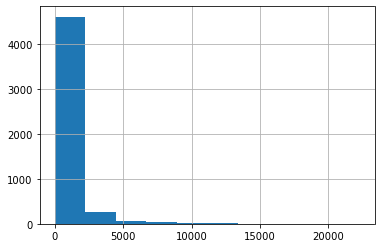

In [153]:
df_1=df.sample(5000)
df_1.linehaulcost.hist()
plt.show()

In [154]:
f_oneway(df, df_1)

F_onewayResult(statistic=array([1.76413517e-04, 6.21704356e-01, 2.34534697e-02, 1.12230449e+00,
       1.00807492e-01, 7.80175133e-01, 3.81056109e-02]), pvalue=array([0.98940292, 0.43042687, 0.87828575, 0.28943952, 0.75086709,
       0.37710148, 0.84523382]))

In [151]:
f_oneway(df, df_1)

F_onewayResult(statistic=array([0.73141791, 0.32400351, 0.25877837, 0.02013441, 0.25113823,
       0.14212412, 0.52849765]), pvalue=array([0.39243738, 0.56921992, 0.61096802, 0.8871642 , 0.61628197,
       0.70618364, 0.4672503 ]))

## Kruskal-Wallis 

In [161]:
kruskal(df.linehaulcost, df_1.linehaulcost)

KruskalResult(statistic=0.0786071024598483, pvalue=0.7791939716739925)

## Correlation

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

<AxesSubplot:>

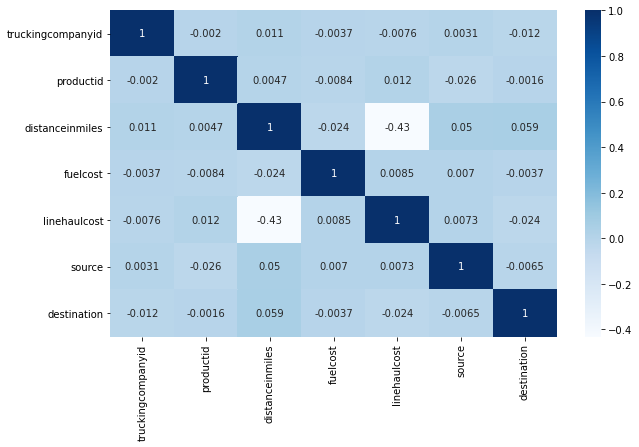

In [169]:
plt.figure(figsize=[10,6])
sns.heatmap(df_1.corr(),annot=True,cmap='Blues')

In [453]:
vif_data = pd.DataFrame() 
vif_data["feature"] = df_1.columns 

In [454]:
vif_data["VIF"] = [variance_inflation_factor(df_1.values, i) 
                          for i in range(len(df_1.columns))] 
  

In [455]:
vif_data

,feature,VIF
0,truckingcompanyid,3.778473
1,productid,3.595782
2,distanceinmiles,3.585605
3,fuelcost,10.773449
4,linehaulcost,1.501674
5,source,3.691528
6,destination,3.659924


In [182]:
vifs = pd.Series(np.linalg.inv(df_1.corr().to_numpy()).diagonal(), 
                 index=df_1.columns, 
                 name='VIF')

In [183]:
vifs

truckingcompanyid    1.000316
productid            1.001061
distanceinmiles      1.237089
fuelcost             1.000735
linehaulcost         1.229724
source               1.004449
destination          1.003805
Name: VIF, dtype: float64

In [180]:
vifs = pd.Series(np.linalg.inv(df.corr().to_numpy()).diagonal(), 
                 index=df.columns, 
                 name='VIF')

In [177]:
vifs = pd.Series(np.linalg.inv(df.corr().to_numpy()).diagonal(), 
                 index=df.columns, 
                 name='VIF')

In [178]:
vifs

truckingcompanyid    1.000128
productid            1.000669
distanceinmiles      1.222514
fuelcost             1.000270
linehaulcost         1.215690
source               1.003279
destination          1.004197
Name: VIF, dtype: float64

In [185]:
from scipy.stats import pearsonr,spearmanr,kendalltau

In [187]:
r, p = pearsonr(df['productid'], df['linehaulcost'])
print(r,p)

In [189]:
r, p = pearsonr(df['fuelcost'], df['linehaulcost'])
print(r,p)

0.0005661441075152972 0.9542175489307347


In [190]:
r, p = pearsonr(df['distanceinmiles'], df['linehaulcost'])
print(r,p)

-0.42053615440857145 0.0


In [191]:
r, p = pearsonr(df['source'], df['linehaulcost'])
print(r,p)

-0.004182500801447676 0.6714643016833661


In [192]:
r, p = pearsonr(df['destination'], df['linehaulcost'])
print(r,p)

-0.02463820833496867 0.012458623895924328


In [193]:
r, p = pearsonr(df['destination'], df['source'])
print(r,p)

-0.01583237356872664 0.10835665258736488


In [194]:
r, p = spearmanr(df['fuelcost'], df['linehaulcost'])
print(r,p)

0.0055199599326622014 0.575636249113348


In [196]:
r, p = kendalltau(df['fuelcost'], df['linehaulcost'])
print(r,p)

0.0036493850161988675 0.5793805826750741


In [197]:
r, p = pearsonr(df['distanceinmiles'], df['fuelcost'])
print(r,p)

-0.008806589075582561 0.37181844447876694


## Top 10 Expensive Companies

In [265]:
a=df

In [266]:
a.loc[:,'lhcpermile']=(a.linehaulcost/a.distanceinmiles).copy()
a.loc[:,'fuelpermile']=(a.fuelcost/a.distanceinmiles).copy()
a.loc[:,'tot_cost']=(a['lhcpermile']+a['fuelpermile']).copy()

In [267]:
a_mean=a.groupby('truckingcompanyid')['tot_cost'].mean()

In [298]:
idx=a_mean.sort_values(ascending=False)[:10].index
a_mean.sort_values(ascending=False)[:10]

truckingcompanyid
1699    358.111488
6665    228.884710
5287    211.747123
8645    199.992191
9108    191.294081
6832    180.053535
6857    178.405364
2205    168.558364
3849    161.222667
1598    146.830970
Name: tot_cost, dtype: float64

In [269]:
df[df.truckingcompanyid.isin(idx)]

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination,lhcpermile,fuelpermile,tot_cost,agg
571,9108,7,97.32,5.59,18611.15,Fort Worth,Columbus,191.236642,0.057439,191.294081,1
735,8645,8,97.32,3.80,19459.44,Tampa,Tulsa,199.953144,0.039046,199.992191,1
1664,2205,8,97.32,3.42,16400.68,Oklahoma City,Detroit,168.523222,0.035142,168.558364,1
1949,3849,7,97.32,5.77,15684.42,Tulsa,Tampa,161.163379,0.059289,161.222667,1
4123,6665,20,97.32,7.02,22268.04,Chicago,Houston,228.812577,0.072133,228.884710,1
5986,1598,19,97.32,4.21,14285.38,Charlotte,Columbus,146.787711,0.043259,146.830970,1
6052,5287,8,97.32,6.49,20600.74,Albuquerque,Tucson,211.680436,0.066687,211.747123,1
6638,6857,3,97.32,5.09,17357.32,Boston,El Paso,178.353062,0.052302,178.405364,1
7008,1699,2,97.32,5.88,34845.53,San Antonio,San Diego,358.051069,0.060419,358.111488,1
9703,6832,12,97.32,4.89,17517.92,Albuquerque,Tucson,180.003288,0.050247,180.053535,1


## Top 10 most source-destinated companies

In [270]:
b=df
b['agg']=1

In [272]:
sd=b.groupby(['truckingcompanyid','source','destination'])['agg'].sum()
b.groupby(['truckingcompanyid','source','destination'])['agg'].sum()

truckingcompanyid  source        destination  
1001               Charlotte     Las Vegas        1
                   Philadelphia  Milwaukee        1
1002               Las Vegas     Oklahoma City    1
1003               Nashville     Houston          1
1004               Louisville    Arlington        1
                                                 ..
9992               Kansas City   Tucson           1
9993               Charlotte     Miami            1
9995               Oakland       Boston           1
                   Tucson        Jacksonville     1
9998               Dallas        Omaha            1
Name: agg, Length: 10282, dtype: int64

In [279]:
sd_df=pd.DataFrame(sd).reset_index()

In [286]:
sd_df.agg

<bound method DataFrame.aggregate of        truckingcompanyid        source    destination  agg
0                   1001     Charlotte      Las Vegas    1
1                   1001  Philadelphia      Milwaukee    1
2                   1002     Las Vegas  Oklahoma City    1
3                   1003     Nashville        Houston    1
4                   1004    Louisville      Arlington    1
...                  ...           ...            ...  ...
10277               9992   Kansas City         Tucson    1
10278               9993     Charlotte          Miami    1
10279               9995       Oakland         Boston    1
10280               9995        Tucson   Jacksonville    1
10281               9998        Dallas          Omaha    1

[10282 rows x 4 columns]>

In [302]:
idx=sd[(sd>1)].index
sd[(sd>1)]

truckingcompanyid  source    destination
1506               Oakland   New Orleans    2
4352               Boston    Fort Worth     2
6417               Portland  Arlington      2
7443               Memphis   Boston         2
Name: agg, dtype: int64

In [305]:
df[df.truckingcompanyid.isin([1506,4352,6417,7443])].sort_values(by='truckingcompanyid')

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination,lhcpermile,fuelpermile,tot_cost,agg
292,1506,21,486.60,3.72,1242.72,Oakland,New Orleans,2.553884,0.007645,2.561529,1
8760,1506,3,486.60,5.32,1585.41,Oakland,New Orleans,3.258138,0.010933,3.269071,1
608,4352,3,778.56,7.70,1313.77,Boston,Fort Worth,1.687436,0.009890,1.697326,1
5710,4352,3,291.96,4.41,8668.78,Albuquerque,Louisville,29.691670,0.015105,29.706775,1
5722,4352,17,778.56,4.77,1293.29,Boston,Fort Worth,1.661131,0.006127,1.667258,1
9375,4352,1,2335.68,5.07,876.92,Chicago,Las Vegas,0.375445,0.002171,0.377616,1
3494,6417,13,1167.84,3.80,512.45,Louisville,Indianapolis,0.438802,0.003254,0.442055,1
7686,6417,5,2238.36,4.39,93.04,Portland,Arlington,0.041566,0.001961,0.043527,1
10208,6417,12,2238.36,5.03,122.32,Portland,Arlington,0.054647,0.002247,0.056894,1
3744,7443,22,681.24,5.04,146.08,Memphis,Boston,0.214433,0.007398,0.221831,1


In [313]:
df[(df.source=="New Orleans") & (df.destination=="Oakland")]

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination,lhcpermile,fuelpermile,tot_cost,agg
4601,7830,18,486.6,5.96,873.43,New Orleans,Oakland,1.794965,0.012248,1.807213,1
5935,2854,1,486.6,5.55,584.13,New Orleans,Oakland,1.200432,0.011406,1.211837,1
7040,7797,1,486.6,4.11,1873.54,New Orleans,Oakland,3.850267,0.008446,3.858714,1
7928,2824,10,486.6,5.56,346.66,New Orleans,Oakland,0.712413,0.011426,0.723839,1


In [314]:
sd_1=b.groupby(['source','destination'])['agg'].sum()
b.groupby(['source','destination'])['agg'].sum()

source       destination   
Albuquerque  Arlington          5
             Atlanta            5
             Austin             4
             Baltimore          4
             Boston             4
                               ..
Washington   Seattle            5
             Tampa              4
             Tucson             9
             Tulsa             10
             Virginia Beach     6
Name: agg, Length: 2312, dtype: int64

In [324]:
sd_1.ravel()

array([ 5,  5,  4, ...,  9, 10,  6], dtype=int64)

In [328]:
bc=pd.DataFrame(sd_1.index)

In [329]:
bc['src_dest_sum']=sd_1.ravel()

In [334]:
bc.sort_values('src_dest_sum',ascending=False)[:10]

,0,src_dest_sum
305,"(Charlotte, Las Vegas)",16
587,"(Detroit, Fresno)",12
1509,"(Oklahoma City, Albuquerque)",12
1859,"(San Antonio, Indianapolis)",12
1681,"(Phoenix, Minneapolis)",12
1862,"(San Antonio, Las Vegas)",12
1362,"(Minneapolis, Seattle)",11
121,"(Atlanta, Miami)",11
1627,"(Philadelphia, Los Angeles)",11
1068,"(Los Angeles, Nashville)",11


In [341]:
df[(df.source=="Charlotte") & (df.destination=="Las Vegas")]

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination,lhcpermile,fuelpermile,tot_cost,agg
412,4016,4,1167.84,5.28,93.46,Charlotte,Las Vegas,0.080028,0.004521,0.084549,1
1234,1328,19,1167.84,5.98,73.55,Charlotte,Las Vegas,0.062980,0.005121,0.068100,1
1796,1755,14,1167.84,5.65,292.61,Charlotte,Las Vegas,0.250557,0.004838,0.255395,1
2722,1001,21,1167.84,5.67,226.86,Charlotte,Las Vegas,0.194256,0.004855,0.199111,1
3103,6111,4,1167.84,6.71,137.91,Charlotte,Las Vegas,0.118090,0.005746,0.123835,1
3267,7561,22,1167.84,5.97,743.56,Charlotte,Las Vegas,0.636697,0.005112,0.641809,1
4008,2726,12,1167.84,4.99,160.42,Charlotte,Las Vegas,0.137365,0.004273,0.141638,1
4632,4417,20,1167.84,6.42,432.82,Charlotte,Las Vegas,0.370616,0.005497,0.376113,1
4800,4551,11,1167.84,6.67,403.63,Charlotte,Las Vegas,0.345621,0.005711,0.351332,1
5055,7550,11,1167.84,5.28,315.28,Charlotte,Las Vegas,0.269968,0.004521,0.274490,1


## Modelling

In [402]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression,RidgeCV,Lasso
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import mean_squared_error

In [403]:
df.source=df.source.astype('category').cat.codes
df.destination=df.destination.astype('category').cat.codes

In [429]:
X=df.loc[:,df.columns != 'linehaulcost']
y=df['linehaulcost']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [353]:
regr = AdaBoostRegressor(n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [354]:
y_pred=regr.predict(X_test)

In [355]:
residuals=y_test-y_pred

<AxesSubplot:>

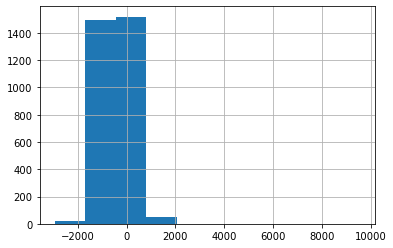

In [356]:
residuals.hist()

In [369]:
regr.score(X_test, y_test)

0.8956300447743082

In [359]:
y_test.shape

(3086,)

In [366]:
pd.Series(y_pred)

0       695.067037
1       695.067037
2       695.067037
3       695.067037
4       695.067037
           ...    
3081    695.067037
3082    824.661613
3083    807.826436
3084    695.067037
3085    695.067037
Length: 3086, dtype: float64

In [364]:
y_test

7230     302.73
652      289.57
4396      50.62
7310      36.95
5724     355.20
         ...   
8618     156.87
2631    1415.53
9707     942.85
9720     191.05
1395      66.77
Name: linehaulcost, Length: 3086, dtype: float64

In [395]:
classifiers_1 = [
    'LinearRegression',
    'RidgeCV',
    'KernelRidge',
    'Lasso',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'SVR', 
    'LinearSVR', 
    ]

In [391]:
%%time
classifiers = [
    LinearRegression(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    ]

name = []
score = []
models = []
rmse = []
regsr=[]
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(classifiers_1[i] )
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))
    regsr.append(classifier.score(X_test, y_test))
    i+=1

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 2min 46s


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [392]:
scores=pd.DataFrame()

In [393]:
scores['name']=name
scores['score']=score
scores['models']=models
scores['regsr']=regsr
scores['rmse']=rmse


In [394]:
scores

,name,score,models,regsr,rmse
0,<class 'sklearn.linear_model.base.LinearRegres...,0.910229,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.910229,542.473097
1,<class 'sklearn.linear_model.ridge.RidgeCV'>,0.910225,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ...",0.910225,542.486457
2,<class 'sklearn.kernel_ridge.KernelRidge'>,0.856343,"KernelRidge(alpha=0.6, coef0=2.5, degree=3, ga...",0.856343,686.237933
3,<class 'sklearn.linear_model.coordinate_descen...,0.908816,"Lasso(alpha=16, copy_X=True, fit_intercept=Tru...",0.908816,546.727255
4,<class 'sklearn.ensemble.forest.RandomForestRe...,0.981924,"(DecisionTreeRegressor(criterion='mse', max_de...",0.981924,243.423187
5,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.992683,([DecisionTreeRegressor(criterion='friedman_ms...,0.992683,154.870121
6,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.917918,"(DecisionTreeRegressor(criterion='mse', max_de...",0.917918,518.720717
7,<class 'sklearn.svm.classes.SVR'>,-0.089116,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.089116,1889.504555
8,<class 'sklearn.svm.classes.LinearSVR'>,0.898905,"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_i...",0.898905,575.671410


In [390]:
scores

,name,score,models,rmse
0,<class 'sklearn.linear_model.base.LinearRegres...,0.910229,"LinearRegression(copy_X=True, fit_intercept=Tr...",542.473097
1,<class 'sklearn.linear_model.ridge.RidgeCV'>,0.910225,"RidgeCV(alphas=array([0.001, 0.01 , 0.1 , 1. ...",542.486457
2,<class 'sklearn.kernel_ridge.KernelRidge'>,0.856343,"KernelRidge(alpha=0.6, coef0=2.5, degree=3, ga...",686.237933
3,<class 'sklearn.linear_model.coordinate_descen...,0.908816,"Lasso(alpha=16, copy_X=True, fit_intercept=Tru...",546.727255
4,<class 'sklearn.ensemble.forest.RandomForestRe...,0.984510,"(DecisionTreeRegressor(criterion='mse', max_de...",225.342078
5,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.992704,([DecisionTreeRegressor(criterion='friedman_ms...,154.656206
6,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.905638,"(DecisionTreeRegressor(criterion='mse', max_de...",556.171920
7,<class 'sklearn.svm.classes.SVR'>,-0.089116,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",1889.504555
8,<class 'sklearn.svm.classes.LinearSVR'>,0.897266,"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_i...",580.320816


In [396]:
from sklearn.preprocessing import PolynomialFeatures

In [397]:
from sklearn.pipeline import Pipeline

In [446]:
model = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(X.loc[0:5000,:], y.loc[0:5000])

In [447]:
model.score(X.iloc[5001:,:], y[5001:])

0.9726652299872074

In [448]:
model.predict(X_test)

array([2052.74964727, 3390.83555102,  208.79985434, ..., 4751.39451762,
         28.65316971,  550.33276083])

In [449]:
y_test

4154    2065.10
8607    3416.69
7602     192.22
1352     159.18
8266     213.83
         ...   
7965     610.66
7685    6668.21
266     4822.71
3278      81.13
581      524.49
Name: linehaulcost, Length: 3086, dtype: float64